판다스 매일매일이 새로워...
# chained index warn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

In [2]:
dfb = pd.DataFrame({'a': ['one', 'one', 'two',
                          'three', 'two', 'one', 'six'],
                    'c': np.arange(7)})
dfb

,a,c
0,one,0
1,one,1
2,two,2
3,three,3
4,two,4
5,one,5
6,six,6


In [3]:
# 오늘의 내가 의문인 부분 : 열 추가하기
dfb["f"] = range(6, 13)

In [4]:
dfb

,a,c,f
0,one,0,6
1,one,1,7
2,two,2,8
3,three,3,9
4,two,4,10
5,one,5,11
6,six,6,12


In [5]:
dfb["cf"] = dfb["c"] + dfb["f"]
dfb

,a,c,f,cf
0,one,0,6,6
1,one,1,7,8
2,two,2,8,10
3,three,3,9,12
4,two,4,10,14
5,one,5,11,16
6,six,6,12,18


In [19]:
# 데이터 불러오기 
weatherDF = pd.read_csv("daegu-utf8-df.csv")
weatherDF['날짜'] =	pd.to_datetime(weatherDF['날짜'], format='%Y-%m-%d')
weatherDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41999 entries, 0 to 41998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41999 non-null  datetime64[ns]
 1   지점      41999 non-null  int64         
 2   평균기온    41999 non-null  float64       
 3   최저기온    41999 non-null  float64       
 4   최고기온    41999 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


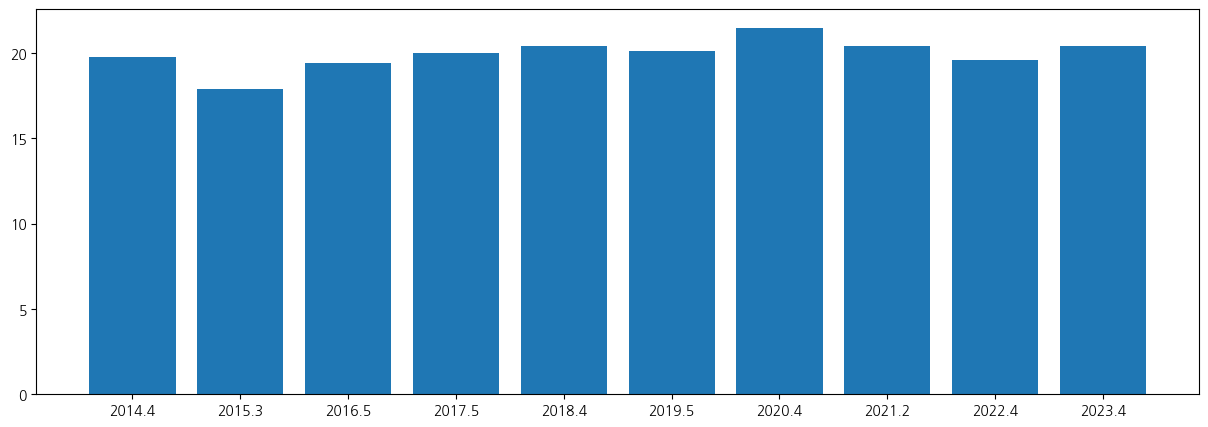

In [25]:
decade_start = 2014
diff_List = [] # y축
YM_List = []  # x축
for year in range(decade_start, decade_start+10):
    yearDF = pd.DataFrame(weatherDF[weatherDF["날짜"].dt.year == year]) # 해당 연 걸러줌 
    # or DataFrame 대신 .copy()하면 괜찮음 
    # 일교차를 구하고 해당 달을 거르
   
    yearDF.loc[:, "일교차"] = yearDF["최고기온"] - yearDF["최저기온"]
    # yearDF.insert(loc=0, column='일교차', value=list(yearDF["최고기온"] - yearDF["최저기온"]))
    diff_List.append(yearDF.sort_values("일교차").tail(1).iloc[0, -1])
    
    m = yearDF.sort_values("일교차").tail(1)["날짜"].dt.month.iloc[0]
    YM_List.append(str(year)+"."+str(m))
     # monthDF = yearDF[monthDF["날짜"].dt.month == month] # 년 + 달 까지 걸러줌
plt.figure(figsize=(15, 5))
plt.bar(YM_List, diff_List)
plt.show()

C:\Users\kdp\AppData\Local\Temp\ipykernel_13816\3000533269.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearDF.loc[:, "일교차"] = yearDF["최고기온"] - yearDF["최저기온"]
C:\Users\kdp\AppData\Local\Temp\ipykernel_13816\3000533269.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearDF.loc[:, "일교차"] = yearDF["최고기온"] - yearDF["최저기온"]
C:\Users\kdp\AppData\Local\Temp\ipykernel_13816\3000533269.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

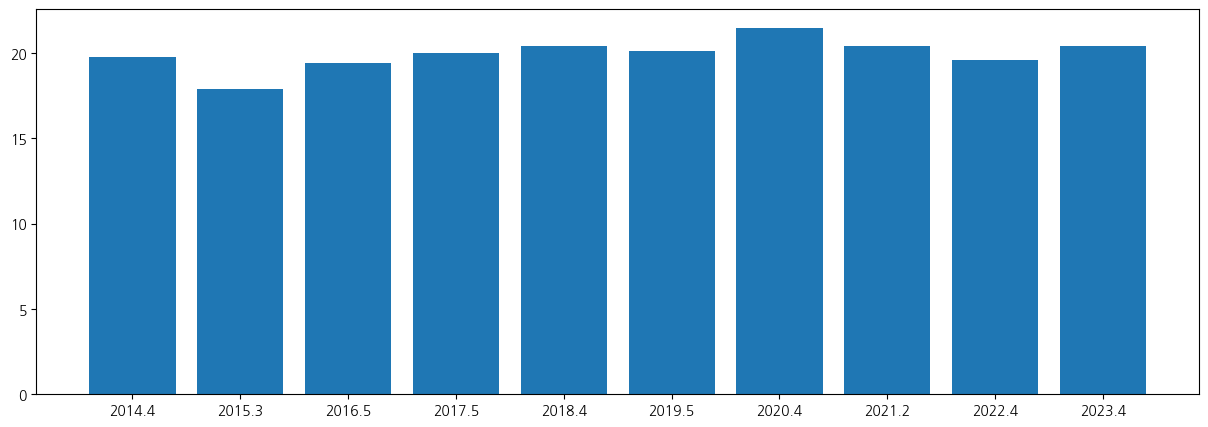

In [24]:
decade_start = 2014
diff_List = [] # y축
YM_List = []  # x축
for year in range(decade_start, decade_start+10):
    yearDF = weatherDF[weatherDF["날짜"].dt.year == year] # 해당 연 걸러줌 
    # 위에 코드와 차이는 weatherDF를 다시 DF시켰는가 아닌가의 차이이다.
    # SettingWithCopyWarning -> 복사본, loc 사용하기 
    # 일교차를 구하고 해당 달을 거르
    # yearDF["일교차"] = yearDF["최고기온"] - yearDF["최저기온"]
    yearDF.loc[:, "일교차"] = yearDF["최고기온"] - yearDF["최저기온"]
    # yearDF.insert(loc=0, column='일교차', value=list(yearDF["최고기온"] - yearDF["최저기온"]))
    diff_List.append(yearDF.sort_values("일교차").tail(1).iloc[0, -1])
    
    m = yearDF.sort_values("일교차").tail(1)["날짜"].dt.month.iloc[0]
    YM_List.append(str(year)+"."+str(m))
     # monthDF = yearDF[monthDF["날짜"].dt.month == month] # 년 + 달 까지 걸러줌
plt.figure(figsize=(15, 5))
plt.bar(YM_List, diff_List)
plt.show()

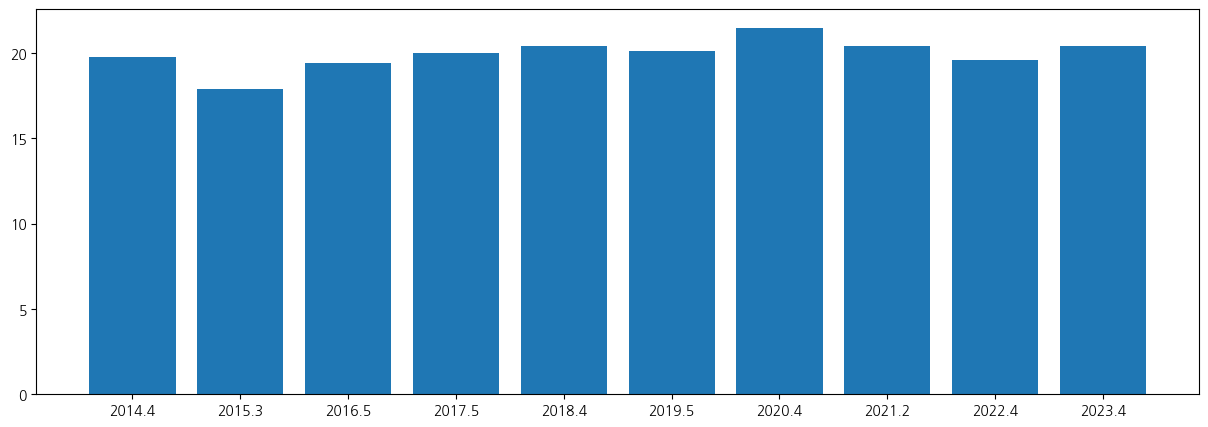

In [46]:
decade_start = 2014
diff_List = [] # y축
YM_List = []  # x축
for year in range(decade_start, decade_start+10):
    yearDF = weatherDF[weatherDF["날짜"].dt.year == year].copy() # 해당 연 걸러줌 
    # 위에 코드와 차이는 weatherDF를 다시 DF시켰는가 아닌가의 차이이다.
    # SettingWithCopyWarning -> 복사본, loc 사용하기 
    # 일교차를 구하고 해당 달을 거르
    # yearDF["일교차"] = yearDF["최고기온"] - yearDF["최저기온"]
    yearDF.loc[:, "일교차"] = yearDF["최고기온"] - yearDF["최저기온"]
    # yearDF.insert(loc=0, column='일교차', value=list(yearDF["최고기온"] - yearDF["최저기온"]))
    diff_List.append(yearDF.sort_values("일교차").tail(1).iloc[0, -1])
    
    m = yearDF.sort_values("일교차").tail(1)["날짜"].dt.month.iloc[0]
    YM_List.append(str(year)+"."+str(m))
     # monthDF = yearDF[monthDF["날짜"].dt.month == month] # 년 + 달 까지 걸러줌
plt.figure(figsize=(15, 5))
plt.bar(YM_List, diff_List)
plt.show()

In [21]:
yearDF

,날짜,지점,평균기온,최저기온,최고기온,일교차
41634,2023-01-01,143,1.7,-3.9,7.1,11.0
41635,2023-01-02,143,0.4,-1.9,4.2,6.1
41636,2023-01-03,143,-0.3,-3.5,4.6,8.1
41637,2023-01-04,143,1.1,-3.5,6.5,10.0
41638,2023-01-05,143,0.6,-5.2,7.3,12.5
...,...,...,...,...,...,...
41994,2023-12-27,143,3.8,-0.9,11.3,12.2
41995,2023-12-28,143,3.5,-3.0,10.6,13.6
41996,2023-12-29,143,3.1,-2.9,9.5,12.4
41997,2023-12-30,143,2.9,-2.9,7.7,10.6


In [15]:
yearDF = weatherDF[weatherDF["날짜"].dt.year == 2013]
yearDF = yearDF.copy()
yearDF["일교차"] = yearDF["최고기온"] - yearDF["최저기온"]

In [12]:
id(yearDF)

2862319768672

In [14]:
id( weatherDF[weatherDF["날짜"].dt.year == year] )

2862263622480

In [9]:
weatherDF["일교차"] = weatherDF["최고기온"] - weatherDF["최저기온"]
weatherDF

,날짜,지점,평균기온,최저기온,최고기온,일교차
0,1909-01-01,143,-4.1,-8.0,0.1,8.1
1,1909-01-02,143,-0.8,-6.7,6.1,12.8
2,1909-01-03,143,1.0,-2.4,3.6,6.0
3,1909-01-04,143,4.2,0.0,9.2,9.2
4,1909-01-05,143,3.4,-0.4,9.0,9.4
...,...,...,...,...,...,...
41994,2023-12-27,143,3.8,-0.9,11.3,12.2
41995,2023-12-28,143,3.5,-3.0,10.6,13.6
41996,2023-12-29,143,3.1,-2.9,9.5,12.4
41997,2023-12-30,143,2.9,-2.9,7.7,10.6


### <hr>아무튼 chained indexing Warning방지와 복수 col 맛보기

In [27]:
df = pd.DataFrame([list("abcd"),
                 list("efgh"),
                 list("ijkl"),
                 list("mnop")], # 여기까지가 value
                 columns=pd.MultiIndex.from_product([
                     ["one", "two"],
                     ["first", "second"]
                 ]))
df

one          two       
  first second first second
0     a      b     c      d
1     e      f     g      h
2     i      j     k      l
3     m      n     o      p

In [35]:
df.loc[:,("one")] # 권장

,first,second
0,a,b
1,e,f
2,i,j
3,m,n


In [42]:
df["one"]["first"] # 비추 -> chain Index warning 유발 

0    a
1    e
2    i
3    m
Name: first, dtype: object

이러면 df["one"] 부터 실행하고 그 다음 ["first"] 실행  
여기서 판다스는 df2 = df["one"]으로 두고 df2["first"]로 실행함  
줄줄줄 하지마
# 복수 Index의 맛 TV

In [49]:
df = pd.DataFrame([list("abcd"),
                 list("efgh"),
                 list("ijkl"),
                 list("mnop")], # 여기까지가 value
                 columns=pd.MultiIndex.from_product([
                     ["one", "two"],
                     ["first", "second"]
                 ]))
df

one          two       
  first second first second
0     a      b     c      d
1     e      f     g      h
2     i      j     k      l
3     m      n     o      p

- MultiIndex.from_arrays(arrays, sortorder=None, names=None)
- MultiIndex.from_tuple(tuples, sortorder=None, names=None)
- MultiIndex.from_product(iterables, sortorder=None, names=None)
- MultiIndex.from_frame(df, sortorder=None, names=None)
     * sortorder:int형 자료형을 입력받으며 정렬시킬 level
     * names:str로 구성된 list-like자료형을 입력받으며, level에 대한 명칭 입력

In [48]:
# 모듈 import 
import pandas as pd
import numpy as np

In [51]:
# 배열을 이용한 MultiIndex
ex_array = np.array([["A", "A", "B", "B", "C", "C", "D", "D"],
                    ["a", "b", "a", "b", "a", "b", "a", "b"]])
ex_index = pd.MultiIndex.from_arrays(ex_array)
ex_index

MultiIndex([('A', 'a'),
            ('A', 'b'),
            ('B', 'a'),
            ('B', 'b'),
            ('C', 'a'),
            ('C', 'b'),
            ('D', 'a'),
            ('D', 'b')],
           )

In [53]:
# 위에서 생성한 멀티 인덱스를 인덱스로 
ex_s = pd.Series(range(8), index=ex_index)
ex_s

A  a    0
   b    1
B  a    2
   b    3
C  a    4
   b    5
D  a    6
   b    7
dtype: int64

In [54]:
ex_s = pd.DataFrame(range(8), index=ex_index)
ex_s

0
A a  0
  b  1
B a  2
  b  3
C a  4
  b  5
D a  6
  b  7

In [62]:
# 
ex_tuple = [('A', 'a'),
            ('A', 'b'),
            ('B', 'a'),
            ('B', 'b'),
            ('C', 'a'),
            ('C', 'b'),
            ('D', 'a'),
            ('D', 'b')]
array_index = pd.MultiIndex.from_arrays(ex_tuple)
array_index

MultiIndex([('A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'),
            ('a', 'b', 'a', 'b', 'a', 'b', 'a', 'b')],
           )

In [60]:
# 튜플 
ex_tuple = [('A', 'a'),
            ('A', 'b'),
            ('B', 'a'),
            ('B', 'b'),
            ('C', 'a'),
            ('C', 'b'),
            ('D', 'a'),
            ('D', 'b')]
tuple_index = pd.MultiIndex.from_tuples(ex_tuple)
tuple_index

MultiIndex([('A', 'a'),
            ('A', 'b'),
            ('B', 'a'),
            ('B', 'b'),
            ('C', 'a'),
            ('C', 'b'),
            ('D', 'a'),
            ('D', 'b')],
           )

In [63]:
ex_s = pd.Series(range(8), index=tuple_index)
ex_s

A  a    0
   b    1
B  a    2
   b    3
C  a    4
   b    5
D  a    6
   b    7
dtype: int64

In [68]:
# MultiIndex.from_product(iterables, sortorder=None, names=None)
ex_prod = [["A", "B", "C", "D"], ["a", "b"]]
iter_index = pd.MultiIndex.from_product(ex_prod)
iter_index

MultiIndex([('A', 'a'),
            ('A', 'b'),
            ('B', 'a'),
            ('B', 'b'),
            ('C', 'a'),
            ('C', 'b'),
            ('D', 'a'),
            ('D', 'b')],
           )

In [69]:
ex_s = pd.Series(range(8), index=iter_index)
ex_s

A  a    0
   b    1
B  a    2
   b    3
C  a    4
   b    5
D  a    6
   b    7
dtype: int64

In [70]:
ex_s.index.names

FrozenList([None, None])

# iter, next 함수 활용하기
- iter는 반복 가능한 객체에서 __ _iter_ __ 메서드를 호출
- next는 반복 가능한 객체에서 __ _next_ __ 메서드를 호출

In [77]:
it = iter(range(3))

In [78]:
next(it)

0

In [79]:
next(it)

1

In [80]:
next(it)

2

In [81]:
next(it)

StopIteration: 

In [82]:
# iter 반복을 끝낼 값을 지정하면 특정 값이 나올 때 반복을 끝냄
iter(호출할 객체, sentinel)
# sentinel : 반복을 끝낼 값 = 감시병

In [83]:
import random
it = iter(lambda:random.randint(0, 5), 2)

# plt.xticks(눈금을 적용할 x축의 실제 위치, 해당 위치에 나타낼 값)